# Connect to Google Drive

In [76]:
# You need to download the Diabetics dataset at: https://www.kaggle.com/datasets/kandij/diabetes-dataset/data
# Use Google Drive as Data Storage
from google.colab import drive
drive.mount('/content/gdrive')

!ls -l ./gdrive/MyDrive/Colab\ Notebooks/datasets

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
total 24
-rw------- 1 root root 23875 Oct 17 04:57 diabetes2.csv


# Load Data

In [77]:
import pandas as pd

# load data from "diabetes2.csv" file located on google drive
rawdata = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/diabetes2.csv')

In [78]:
# display the top rows
rawdata.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [79]:
# get a quick description of the data, including # of rows, # of features, name of each feature, type of each feature, # of non-null values
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [80]:
# show a summary of the numerical attributes
rawdata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#  Task 1: Preprocess Data

In [81]:
import numpy as np
# split data and target
data = rawdata.drop("Outcome", axis=1, inplace=False).astype(float)
target = rawdata["Outcome"].copy()
# make target 2d matrix
target = target[:, np.newaxis]
print(data.shape)
print(target.shape)

(768, 8)
(768, 1)


<ipython-input-81-72505d64a7d8>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  target = target[:, np.newaxis]


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
dtypes: float64(8)
memory usage: 48.1 KB


In [83]:
# feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("std_scaler", StandardScaler())
])

data = num_pipeline.fit_transform(data)

In [84]:
# print first 5 rows
print("data ->")
print("data.shape: ", data.shape)
print(data[:5])

print()

print("target ->")
print("target.shape: ", target.shape)
print(target[:5])

data ->
data.shape:  (768, 8)
[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]
 [-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]
 [-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964 ]]

target ->
target.shape:  (768, 1)
[[1]
 [0]
 [1]
 [0]
 [1]]


# Task 2: Split Dataset for Training, Validation, and Testing

In [85]:
from sklearn.model_selection import train_test_split
# split training, validation, and testing data __ 60%, 20%, 20%
train_data, validation_data, train_target, validation_target = train_test_split(data, target, test_size=0.2, random_state=42)
train_data, test_data, train_target, test_target = train_test_split(train_data, train_target, test_size=0.25, random_state=42)

# print shape
print("train_data.shape =", train_data.shape)
print("train_target.shape =", train_target.shape)
print()
print("valid_data.shape =", validation_data.shape)
print("valid_target.shape =", validation_target.shape)
print()
print("test_data.shape =", test_data.shape)
print("test_target.shape =", test_target.shape)

train_data.shape = (460, 8)
train_target.shape = (460, 1)

valid_data.shape = (154, 8)
valid_target.shape = (154, 1)

test_data.shape = (154, 8)
test_target.shape = (154, 1)


# Task 3: Use Logistic Regression using Scikit-learn

In [86]:
from sklearn.linear_model import LogisticRegression

# create model
lr = LogisticRegression()
lr.fit(train_data, train_target)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [87]:
# print weights and biases
print("Weights:", lr.coef_)
print("Bias:", lr.intercept_)

Weights: [[ 0.18573298  0.89248159 -0.36580058  0.1072025  -0.15000066  0.78462133
   0.18463707  0.56223892]]
Bias: [-0.87631239]


In [88]:
from sklearn.metrics import log_loss

# print log loss for training, validation, and testing dataset using sklearn
print("Training loss using sklearn - Log_loss:", log_loss(train_target, lr.predict_proba(train_data)))
print("Validation loss using sklearn - Log_loss:", log_loss(validation_target, lr.predict_proba(validation_data)))
print("Testing loss using sklearn - Log_loss:", log_loss(test_target, lr.predict_proba(test_data)))

Training loss using sklearn - Log_loss: 0.476774118245957
Validation loss using sklearn - Log_loss: 0.5277040564575601
Testing loss using sklearn - Log_loss: 0.4549991193734869


In [89]:
from sklearn.metrics import confusion_matrix

pred = lr.predict(test_data)

# get confusion matrix for testing dataset
confusion_matrix(test_target, pred)

array([[95,  6],
       [28, 25]])

# Task 4: Implement stochastic gradient descent method to perform logistic regression

In [90]:
# logistic regression
def myModel(X, w):
  f = lambda x: 1.0/(1.0 + np.exp(-x))
  return f(np.dot(X, w))

In [91]:
# calculate cross entropy loss
# Everything is element-wise operations
def lossFunction(X, w, y):
  return (-1) * np.mean(np.multiply(y, np.log(myModel(X,w))) + np.multiply((1 - y), np.log(1 - myModel(X,w))))

In [93]:
import math

def trainingLoop(train_data, train_target, validation_data, validation_target, learning_rate, numItrs, batch_size):
  # get number of batches in training data
  num_batches = math.ceil(train_data.shape[0] / batch_size)

  # initialzie error arrays
  training_error = np.zeros(numItrs * num_batches)
  validation_error = np.zeros(numItrs * num_batches)

  # initialize weights
  w = np.random.normal(0, 1, (train_data.shape[1], 1))

  # start training
  for i in range(numItrs):
    # run gradient descent on batches
    current_batch = 0
    for start in range(0, train_data.shape[0], batch_size):
      # split train_data into batches
      train_data_batch = train_data[start:start + batch_size]
      train_target_batch = train_target[start:start + batch_size]

      # calculate gradient
      sig = lambda x: 1.0/(1.0 + np.exp(-x))
      gradient = (-1) * np.dot(train_data_batch.T, (train_target_batch - sig(np.dot(train_data_batch, w)))) / train_data_batch.shape[0]

      # update weights
      w = w + learning_rate * (-1 * gradient)

      # add error to list
      batch_count = i * num_batches + current_batch
      training_error[batch_count] = lossFunction(train_data_batch, w, train_target_batch)
      validation_error[batch_count] = lossFunction(validation_data, w, validation_target)
      current_batch += 1

  return w, training_error, validation_error

weights:
 [[ 0.47945839]
 [ 0.9231431 ]
 [-0.28571135]
 [-0.24794365]
 [-0.15476048]
 [ 1.1475251 ]
 [ 0.17319651]
 [ 0.14571202]]
bias: [[-0.92651091]]

Training loss using CS4210 style - Cross Entropy Loss: 0.4968450624442425
Validation loss using CS4210 style - Cross Entropy Loss: 0.4957679311988743
Testing loss using CS4210 style - Cross Entropy Loss: 0.4438827340452756


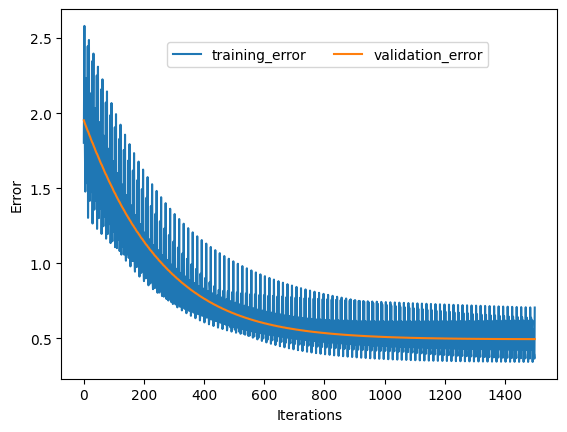

In [94]:
import matplotlib.pyplot as plt

# adding a column of 1s
train_data_bias = np.insert(train_data, 0, 1, axis=1)
validation_data_bias = np.insert(validation_data, 0, 1, axis=1)
test_data_bias = np.insert(test_data, 0, 1, axis=1)

learning_rate = 0.01   # learning rate
batch_size = 32 # number of data samples in a batch
numItrs = 100   # number of epochs

num_batches = math.ceil(train_data.shape[0] / batch_size)

w, train_error, validation_error = trainingLoop(train_data_bias, train_target, validation_data_bias, validation_target, learning_rate, numItrs, batch_size)

# print weights and bias
print("weights:\n", w[1:])
print("bias:", w[:1])
print()

# plot training and validation error
plt.plot(np.arange(numItrs * num_batches), train_error, label = "training_error")
plt.plot(np.arange(numItrs * num_batches), validation_error, label = "validation_error")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol=2)
plt.xlabel("Iterations")
plt.ylabel("Error")

# print log loss for training, validation, and testing dataset using sklearn
print("Training loss using CS4210 style - Cross Entropy Loss:", lossFunction(train_data_bias, w, train_target))
print("Validation loss using CS4210 style - Cross Entropy Loss:", lossFunction(validation_data_bias, w, validation_target))
print("Testing loss using CS4210 style - Cross Entropy Loss:", lossFunction(test_data_bias, w, test_target))